In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fetch Data

In [2]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

dim_ethan = 58
dim_ethen = 48
dim_ethin = 38

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset_ethan, molecules_ethan = make_butadien_dataset(
    np.load("molecules_ethan_6-31g**.npy"),
    *load_triu(*np.load("dataset_ethan_6-31g**.npy"), dim_ethan), 
)


[-] 2018-04-27 22:27:16: Data set normalized. Mean value std: 0.00682801375021252


# Ethan
dim = 58 

dim^2 = 3364

dim_ut = 1711

In [3]:
dim_ethan_triu = int(dim_ethan * (dim_ethan + 1) / 2)

In [6]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import Trainer
from SCFInitialGuess.nn.cost_functions import RegularizedMSE


graph = tf.Graph()

trainer = Trainer(
    EluTrNNN([dim_ethan_triu, dim_ethan_triu, dim_ethan_triu]),
    cost_function=RegularizedMSE(alpha=1e-7),
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3)
)

trainer.setup(target_graph=graph)
network, sess = trainer.train(
    dataset_ethan,
    convergence_threshold=5e-7
)
graph = trainer.graph

[ ] 2018-04-27 22:39:16: Appending to graph: <tensorflow.python.framework.ops.Graph object at 0x7f519ab896d8>
[-] 2018-04-27 22:39:16: Setting up the training in the target graph ...
[-] 2018-04-27 22:39:16: network ...
[-] 2018-04-27 22:39:16: error function ...
[-] 2018-04-27 22:39:16: cost function ...
[-] 2018-04-27 22:39:16: training step
[-] 2018-04-27 22:39:16: Starting network training ...
[ ] 2018-04-27 22:39:16: Val. Cost: 2.094E-02. Error: 2.092E-02. Diff: 1.0E+10
[ ] 2018-04-27 22:39:23: Val. Cost: 1.811E-04. Error: 1.596E-04. Diff: 2.1E-02
[ ] 2018-04-27 22:39:29: Val. Cost: 1.055E-04. Error: 8.445E-05. Diff: 7.5E-05
[ ] 2018-04-27 22:39:36: Val. Cost: 1.224E-04. Error: 1.016E-04. Diff: 1.7E-05
[ ] 2018-04-27 22:39:42: Val. Cost: 2.143E-04. Error: 1.940E-04. Diff: 9.2E-05
[ ] 2018-04-27 22:39:49: Val. Cost: 1.664E-04. Error: 1.469E-04. Diff: 4.7E-05
[ ] 2018-04-27 22:39:56: Val. Cost: 1.303E-04. Error: 1.115E-04. Diff: 3.5E-05
[ ] 2018-04-27 22:40:03: Val. Cost: 1.960E-04.

In [7]:
p_ethan = network.run(sess, dataset_ethan.testing[0])

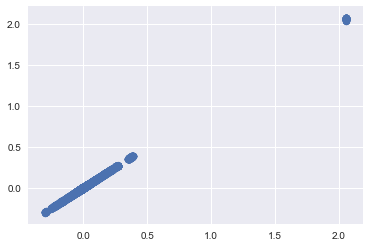

In [8]:
plt.scatter(
    dataset_ethan.testing[1],
    p_ethan
)
plt.show()

In [26]:
from SCFInitialGuess.utilities.analysis import mf_initializer, measure_all_quantities, make_results_str

results_ethan = measure_all_quantities(
    p_ethan,
    dataset_ethan,
    molecules_ethan[1],
    18,
    mf_initializer,
    dim_ethan,
    True
)

[ ] 2018-04-27 22:50:49: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:49: Iteration calculation: 1
[ ] 2018-04-27 22:50:49: Iteration calculation: 2


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:49: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:50: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:50: Iteration calculation: 5
[ ] 2018-04-27 22:50:50: Iteration calculation: 6


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:51: Iteration calculation: 7
[ ] 2018-04-27 22:50:51: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:51: Iteration calculation: 9
[ ] 2018-04-27 22:50:51: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:51: Iteration calculation: 11
[ ] 2018-04-27 22:50:52: Iteration calculation: 12


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:52: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:52: Iteration calculation: 14
[ ] 2018-04-27 22:50:52: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:53: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:53: Iteration calculation: 17
[ ] 2018-04-27 22:50:53: Iteration calculation: 18


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:54: Iteration calculation: 19
[ ] 2018-04-27 22:50:54: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:54: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:54: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:54: Iteration calculation: 23
[ ] 2018-04-27 22:50:55: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:55: Iteration calculation: 25
[ ] 2018-04-27 22:50:55: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:55: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:56: Iteration calculation: 28
[ ] 2018-04-27 22:50:56: Iteration calculation: 29

Warn: Ipython shell catchs sys.args


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:56: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:56: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:57: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:57: Iteration calculation: 33
[ ] 2018-04-27 22:50:57: Iteration calculation: 34


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:57: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:57: Iteration calculation: 36
[ ] 2018-04-27 22:50:58: Iteration calculation: 37


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:58: Iteration calculation: 38
[ ] 2018-04-27 22:50:58: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:58: Iteration calculation: 40
[ ] 2018-04-27 22:50:58: Iteration calculation: 41


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:59: Iteration calculation: 42
[ ] 2018-04-27 22:50:59: Iteration calculation: 43


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:59: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:50:59: Iteration calculation: 45
[ ] 2018-04-27 22:50:59: Iteration calculation: 46


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:00: Iteration calculation: 47
[ ] 2018-04-27 22:51:00: Iteration calculation: 48


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:00: Iteration calculation: 49


In [27]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
1.28960E-03 +- 1.68891E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.25514E-03 +- 2.90520E-04
--- Occupance Error ---
4.05708E-02 +- 2.51558E-02
--- Avg. Iterations ---
9.76000E+00 +- 9.49947E-01



## McWheeny that shit

In [12]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [13]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_ethan_raw = make_matrix_batch(dataset_ethan.inverse_input_transform(dataset_ethan.testing[0]), dim_ethan, True)
p_ethan_batch = make_matrix_batch(p_ethan, dim_ethan, True)

In [14]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_ethan_batch, s_ethan_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_ethan_batch, s_ethan_raw))))

In [28]:
results_ethan = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim_ethan), p_mcw1)),
    dataset_ethan,
    molecules_ethan[1],
    18,
    mf_initializer,
    dim_ethan,
    True
)

[ ] 2018-04-27 22:51:22: Iteration calculation: 0
[ ] 2018-04-27 22:51:22: Iteration calculation: 1


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:22: Iteration calculation: 2
[ ] 2018-04-27 22:51:22: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:23: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:23: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:23: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:23: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:24: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:24: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:24: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:24: Iteration calculation: 11
[ ] 2018-04-27 22:51:24: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:25: Iteration calculation: 13
[ ] 2018-04-27 22:51:25: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:25: Iteration calculation: 15
[ ] 2018-04-27 22:51:25: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:25: Iteration calculation: 17
[ ] 2018-04-27 22:51:26: Iteration calculation: 18


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:26: Iteration calculation: 19
[ ] 2018-04-27 22:51:26: Iteration calculation: 20


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:26: Iteration calculation: 21
[ ] 2018-04-27 22:51:26: Iteration calculation: 22


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:27: Iteration calculation: 23
[ ] 2018-04-27 22:51:27: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:27: Iteration calculation: 25
[ ] 2018-04-27 22:51:27: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:27: Iteration calculation: 27
[ ] 2018-04-27 22:51:28: Iteration calculation: 28


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:28: Iteration calculation: 29
[ ] 2018-04-27 22:51:28: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:28: Iteration calculation: 31
[ ] 2018-04-27 22:51:28: Iteration calculation: 32


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:29: Iteration calculation: 33
[ ] 2018-04-27 22:51:29: Iteration calculation: 34


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:29: Iteration calculation: 35
[ ] 2018-04-27 22:51:29: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:29: Iteration calculation: 37
[ ] 2018-04-27 22:51:30: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:30: Iteration calculation: 39
[ ] 2018-04-27 22:51:30: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:30: Iteration calculation: 41
[ ] 2018-04-27 22:51:30: Iteration calculation: 42


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:31: Iteration calculation: 43
[ ] 2018-04-27 22:51:31: Iteration calculation: 44


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:31: Iteration calculation: 45
[ ] 2018-04-27 22:51:31: Iteration calculation: 46


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:31: Iteration calculation: 47
[ ] 2018-04-27 22:51:32: Iteration calculation: 48


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:51:32: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [29]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
6.23775E-04 +- 9.04179E-05
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
4.05741E-05 +- 1.09580E-05
--- Occupance Error ---
1.41385E-03 +- 8.17764E-04
--- Avg. Iterations ---
7.72000E+00 +- 4.48999E-01



In [17]:
results_ethan = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim_ethan), p_mcw5)),
    dataset_ethan,
    molecules_ethan[1],
    18,
    mf_initializer,
    dim_ethan,
    True
)

[ ] 2018-04-27 22:43:49: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:49: Iteration calculation: 1
[ ] 2018-04-27 22:43:50: Iteration calculation: 2


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:50: Iteration calculation: 3
[ ] 2018-04-27 22:43:50: Iteration calculation: 4


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:50: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:50: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:51: Iteration calculation: 7
[ ] 2018-04-27 22:43:51: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:51: Iteration calculation: 9
[ ] 2018-04-27 22:43:51: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:51: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:52: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:52: Iteration calculation: 13
[ ] 2018-04-27 22:43:52: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:52: Iteration calculation: 15
[ ] 2018-04-27 22:43:52: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:53: Iteration calculation: 17
[ ] 2018-04-27 22:43:53: Iteration calculation: 18


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:53: Iteration calculation: 19
[ ] 2018-04-27 22:43:53: Iteration calculation: 20


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:53: Iteration calculation: 21
[ ] 2018-04-27 22:43:54: Iteration calculation: 22


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:54: Iteration calculation: 23
[ ] 2018-04-27 22:43:54: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:54: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:54: Iteration calculation: 26
[ ] 2018-04-27 22:43:55: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:55: Iteration calculation: 28
[ ] 2018-04-27 22:43:55: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:55: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:56: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:56: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:56: Iteration calculation: 33
[ ] 2018-04-27 22:43:56: Iteration calculation: 34


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:57: Iteration calculation: 35
[ ] 2018-04-27 22:43:57: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:57: Iteration calculation: 37
[ ] 2018-04-27 22:43:57: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:58: Iteration calculation: 39
[ ] 2018-04-27 22:43:58: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:58: Iteration calculation: 41
[ ] 2018-04-27 22:43:58: Iteration calculation: 42


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:59: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:59: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:59: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:59: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:43:59: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:00: Iteration calculation: 48
[ ] 2018-04-27 22:44:00: Iteration calculation: 49


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


In [18]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
6.20814E-04 +- 8.94874E-05
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.22521E-17 +- 1.51861E-18
--- Occupance Error ---
2.20268E-15 +- 2.45008E-15
--- Avg. Iterations ---
7.72000E+00 +- 4.48999E-01



## Classical Ethan

In [19]:
from pyscf.scf import hf

p_sap_ethan = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules_ethan[1]]
p_minao_ethan = [hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules_ethan[1]]
p_gwh_ethan = [hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules_ethan[1]]

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

In [20]:
results_ethan = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim_ethan), p_sap_ethan)),
    dataset_ethan,
    molecules_ethan[1],
    18,
    mf_initializer,
    dim_ethan,
    True
)

Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:12: Iteration calculation: 0
[ ] 2018-04-27 22:44:12: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:12: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:13: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:13: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:13: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:14: Iteration calculation: 6
[ ] 2018-04-27 22:44:14: Iteration calculation: 7


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:14: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:14: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:15: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:15: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:15: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:15: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:16: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:16: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:16: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:16: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:17: Iteration calculation: 18
[ ] 2018-04-27 22:44:17: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:17: Iteration calculation: 20


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:18: Iteration calculation: 21
[ ] 2018-04-27 22:44:18: Iteration calculation: 22
[ ] 2018-04-27 22:44:18: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:18: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:19: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:19: Iteration calculation: 26
[ ] 2018-04-27 22:44:19: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:20: Iteration calculation: 28
[ ] 2018-04-27 22:44:20: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:20: Iteration calculation: 30
[ ] 2018-04-27 22:44:20: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:21: Iteration calculation: 32
[ ] 2018-04-27 22:44:21: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:21: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:21: Iteration calculation: 35
[ ] 2018-04-27 22:44:22: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:22: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:22: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:22: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:23: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:23: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:23: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:24: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:24: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:24: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:24: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:25: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:25: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:25: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [21]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
1.45976E-02 +- 9.17090E-05
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
1.86003E-02 +- 1.70037E-04
--- Occupance Error ---
2.27374E-15 +- 2.53814E-15
--- Avg. Iterations ---
1.25600E+01 +- 4.96387E-01



In [22]:
results_ethan = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim_ethan), p_minao_ethan)),
    dataset_ethan,
    molecules_ethan[1],
    18,
    mf_initializer,
    dim_ethan,
    True
)

[ ] 2018-04-27 22:44:26: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:26: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:26: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:26: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:27: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:27: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:27: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:28: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:28: Iteration calculation: 8
[ ] 2018-04-27 22:44:28: Iteration calculation: 9


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:28: Iteration calculation: 10
[ ] 2018-04-27 22:44:29: Iteration calculation: 11


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:29: Iteration calculation: 12
[ ] 2018-04-27 22:44:29: Iteration calculation: 13


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:29: Iteration calculation: 14
[ ] 2018-04-27 22:44:30: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:30: Iteration calculation: 16
[ ] 2018-04-27 22:44:30: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:30: Iteration calculation: 18
[ ] 2018-04-27 22:44:30: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:31: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:31: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:31: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:32: Iteration calculation: 23
[ ] 2018-04-27 22:44:32: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:32: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:33: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:33: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:33: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:34: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:34: Iteration calculation: 30
[ ] 2018-04-27 22:44:34: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:34: Iteration calculation: 32
[ ] 2018-04-27 22:44:35: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:35: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:35: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:36: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:36: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:36: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:37: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:37: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:38: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:38: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:38: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:39: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:39: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:39: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:40: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:40: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:40: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [23]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
1.36758E-02 +- 1.13897E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
1.90088E-02 +- 1.95211E-04
--- Occupance Error ---
1.34936E-02 +- 4.48130E-05
--- Avg. Iterations ---
1.12400E+01 +- 4.27083E-01



In [24]:
results_ethan = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim_ethan), p_gwh_ethan)),
    dataset_ethan,
    molecules_ethan[1],
    18,
    mf_initializer,
    dim_ethan,
    True
)

[ ] 2018-04-27 22:44:41: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:41: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:41: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:42: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:42: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:43: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:43: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:44: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:44: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:44: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:45: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:45: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:45: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:46: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:46: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:47: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:47: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:48: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:48: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:49: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:49: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:50: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:50: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:50: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:51: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:51: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:52: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:52: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:52: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:53: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:53: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:54: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:54: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:54: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:55: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:55: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:56: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:56: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:56: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:57: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:57: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:57: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:58: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:58: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:59: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:59: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:44:59: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:45:00: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:45:00: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 22:45:00: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [25]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
1.05767E-02 +- 2.12302E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
3.65834E-17 +- 6.43054E-18
--- Occupance Error ---
4.83169E-15 +- 3.60631E-15
--- Avg. Iterations ---
1.37600E+01 +- 4.27083E-01

